### Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import datetime as dt
import os as os

### Fonctions

In [2]:
def get_files_in_folder(folder_path : str) :
    list_of_files = []
    for file_name in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, file_name)):
            list_of_files.append(file_name)
    return list_of_files


def creating_csv_df(folder_path : str,files : list) :
    global_df = pd.DataFrame()
    
    for file in files :
        current_df = pd.read_csv(folder_path + "/" + file)
        if current_df.size != 0 :
            global_df = pd.concat([global_df,current_df])
    return global_df  


def create_dataframe_log(current_file : str):
    with open(current_file,"r") as f :
        current_file = f.readlines()
    rows = []
    for d in current_file:
        
        parts = d.split(' ')
        ip = parts[0]
        date = ' '.join(parts[1:3])
        oe = parts[3]
        rest = ' '.join(parts[4:])
        rows.append((ip, date, oe, rest))
    global_df = pd.DataFrame(rows, columns=['ip', 'date', 'oe', 'rest'])
    
    return global_df


def concat_log_dataframe(folder_path : str, files : list):
    global_df = pd.DataFrame()

    for file in files :
        current_df = create_dataframe_log(folder_path + '/' + file)
        if current_df.size != 0 :
            global_df = pd.concat([global_df,current_df])
    return global_df


def evolution_plot(df,date_column : str,analyzed_value : str,title : str):
    df.set_index(date_column,inplace=True)
    monthly_mean = df[analyzed_value].resample('M').mean()
    plt.plot(monthly_mean, marker='o')
    plt.xlabel('Month')
    plt.ylabel(analyzed_value)
    plt.title(title)
    plt.show()
    


### DataFrame

#### Survey Df

In [3]:
folder_path = "Data/surveys"
files = get_files_in_folder(folder_path)
survey_df = creating_csv_df(folder_path,files)
survey_df["start_date"] = pd.to_datetime(survey_df["start_date"])
survey_df.head(5)


,SAT_question,SAT_answer,SAT_score,start_date,store,app_version,CES_question,CES_answer,CES_score,NPS_question,NPS_answer,NPS_score
0,are you happy with you app?,happy,100,2022-11-05 18:52:10,iOS,iOS_8.1,how difficult was it to purchase your product?,very difficult,-100,would you recommend Orange?,3,-100
1,are you happy with you app?,neutral,0,2022-11-05 18:46:17,Android,Android_8.1,how difficult was it to purchase your product?,neutral,0,would you recommend Orange?,7,0
2,are you happy with you app?,neutral,0,2022-11-05 10:58:14,Android,Android_8.1,how difficult was it to purchase your product?,easy,100,would you recommend Orange?,9,100
3,are you happy with you app?,very angry,-100,2022-11-05 10:39:11,iOS,iOS_8.1,how difficult was it to purchase your product?,very difficult,-100,would you recommend Orange?,8,0
4,are you happy with you app?,neutral,0,2022-11-05 18:10:04,iOS,iOS_8.1,how difficult was it to purchase your product?,neutral,0,would you recommend Orange?,8,0


#### Analytics_logs Df

In [4]:
folder_path = "Data/analytics-logs"
files = get_files_in_folder(folder_path)
analytics_logs_df = creating_csv_df(folder_path,files)
analytics_logs_df["date"] = pd.to_datetime(analytics_logs_df["date"])
analytics_logs_df.head(5)

,logType,eventId,expertsAnalyticsId,sessionId,timestamp,date,access,order,agent
0,expertsAnalytics Web,oe_8143566298343_1671083112379_1671083112379,EAid_Web_3.5,oe_8143566298343_1671083112379,1671083112379,2022-12-15 05:45:12.379,"{""network"": ""WIFI""}","{""name"": ""authentication_start"", ""payload"": {}}","{""store"": ""Web"", ""deviceType"": ""Device(family=..."
1,expertsAnalytics Web,oe_8143566298343_1671083112379_1671083112690,EAid_Web_3.5,oe_8143566298343_1671083112379,1671083112690,2022-12-15 05:45:12.690,"{""network"": ""WIFI""}","{""name"": ""authentication_success"", ""payload"": {}}","{""store"": ""Web"", ""deviceType"": ""Device(family=..."
2,expertsAnalytics Web,oe_8143566298343_1671083112379_1671083114124,EAid_Web_3.5,oe_8143566298343_1671083112379,1671083114124,2022-12-15 05:45:14.124,"{""network"": ""WIFI""}","{""name"": ""home_page"", ""payload"": {}}","{""store"": ""Web"", ""deviceType"": ""Device(family=..."
3,expertsAnalytics Web,oe_8143566298343_1671083112379_1671083114660,EAid_Web_3.5,oe_8143566298343_1671083112379,1671083114660,2022-12-15 05:45:14.660,"{""network"": ""WIFI""}","{""name"": ""get_balance"", ""payload"": {}}","{""store"": ""Web"", ""deviceType"": ""Device(family=..."
4,expertsAnalytics Web,oe_3273112982988_1671084200155_1671084200155,EAid_Web_3.5,oe_3273112982988_1671084200155,1671084200155,2022-12-15 06:03:20.155,"{""network"": ""WIFI""}","{""name"": ""authentication_start"", ""payload"": {}}","{""store"": ""Web"", ""deviceType"": ""Device(family=..."


#### Reviews Df

In [5]:
folder_path = "data/reviews"
files = get_files_in_folder(folder_path)
reviews_df = creating_csv_df(folder_path,files)
reviews_df["start_date"] = pd.to_datetime(reviews_df["start_date"])
reviews_df.head(5)

,store,app_version,country,start_date,review,rate
0,iOS,iOS_8.0,France,2022-10-29 13:35:47,"This app is garbage, it doesn't work and it's ...",3
1,Web,Web_3.3,France,2022-10-29 17:22:43,That mobile app is phenomenal.,4
2,Web,Web_3.3,France,2022-10-29 18:28:52,"I'm extremely dissatisfied with this app, it's...",2
3,Android,Android_8.1,Netherlands,2022-10-29 12:20:48,"Ths app is horriblle, it's not even worth down...",1
4,Android,Android_8.1,Germany,2022-10-29 07:33:58,"This app is garbage, it doesn't work and it's ...",1


#### Backend log

In [6]:
folder_path = "Data/backend-logs"
files = get_files_in_folder(folder_path=folder_path)
backendlogs = concat_log_dataframe(folder_path=folder_path,files=files)
backendlogs['date'] = backendlogs['date'].str[1:-1]
backendlogs["date"] = pd.to_datetime(backendlogs["date"])
backendlogs.head(5)

,ip,date,oe,rest
0,37.74.68.231,2022-10-24 05:01:31.506,oe_0832279287381,"""GET /eden/v2/get?platform=iOS&appVersion=iOS_..."
1,79.227.133.119,2022-10-24 05:05:39.885,oe_7965950955369,"""GET /eden/v2/get?platform=Windows&appVersion=..."
2,79.227.133.119,2022-10-24 05:05:41.727,oe_7965950955369,"""POST /eden/v2/get?platform=Windows&appVersion..."
3,79.227.133.119,2022-10-24 05:05:42.283,oe_7965950955369,"""GET /eden/v2/get?platform=Windows&appVersion=..."
4,79.227.133.119,2022-10-24 05:05:42.328,oe_7965950955369,"""GET /eden/v2/get?platform=Windows&appVersion=..."


#### Public Df

In [7]:
public_cities_geolocations = pd.read_csv("Data/public_cities_geolocations.csv")
public_ip_locations = pd.read_csv("Data/public_ip_locations.csv")
public_user_agent_files = pd.read_csv("Data/public_user_agent_file.csv")
public_users_list = pd.read_csv("Data/public-users-list.csv")

public_users_list["birthdate"] = pd.to_datetime(public_users_list["birthdate"])


#### Backendlogs / public_ip_locations

In [8]:
backenlogs_location = pd.merge(backendlogs,public_ip_locations,how="outer",on="ip",indicator=True)
backenlogs_location = backenlogs_location.loc[backenlogs_location["_merge"]=="both",:]
backenlogs_location

,ip,date,oe,rest,country,country_code,city,_merge
0,37.74.68.231,2022-10-24 05:01:31.506,oe_0832279287381,"""GET /eden/v2/get?platform=iOS&appVersion=iOS_...",Netherlands,NL,Uden,both
1,37.74.68.231,2022-10-24 05:44:18.515,oe_0832279287381,"""GET /eden/v2/get?platform=iOS&appVersion=iOS_...",Netherlands,NL,Uden,both
2,37.74.68.231,2022-10-24 05:44:18.857,oe_0832279287381,"""POST /eden/v2/get?platform=iOS&appVersion=iOS...",Netherlands,NL,Uden,both
3,37.74.68.231,2022-10-24 05:44:21.641,oe_0832279287381,"""GET /eden/v2/get?platform=iOS&appVersion=iOS_...",Netherlands,NL,Uden,both
4,37.74.68.231,2022-10-24 05:44:21.902,oe_0832279287381,"""GET /eden/v2/home?platform=iOS&appVersion=iOS...",Netherlands,NL,Uden,both
...,...,...,...,...,...,...,...,...
848930,200.183.38.23,2022-07-25 16:46:00.634,oe_4008150866725,"""GET /member HTTP/1.0"" 404 123 ""https://mxmva....",Brazil,BR,Cajamar (Guaturinho),both
848931,200.183.38.23,2022-07-25 16:46:00.758,oe_4008150866725,"""GET /temp HTTP/1.0"" 404 123 ""https://sapphicp...",Brazil,BR,Cajamar (Guaturinho),both
848932,183.197.156.35,2022-07-25 16:53:31.325,oe_5459863907518,"""GET /modules HTTP/1.0"" 404 123 ""https://blog....",China,CN,Wangqingtuo,both
848933,183.197.156.35,2022-07-25 16:53:31.606,oe_5459863907518,"""GET /customer HTTP/1.0"" 404 123 ""https://oloo...",China,CN,Wangqingtuo,both


In [9]:
public_cities_geolocations.head(5)

,country,country_code,city,latitude,longitude,geo_point
0,China,CN,Qingzhou,26.4837,117.925,"{'type': 'point', 'coordinates': [26.4837, 117..."
1,China,CN,Changqiao (Xuhui Qu),31.1694,121.408,"{'type': 'point', 'coordinates': [31.1694, 121..."
2,China,CN,Beijing,39.9042,116.407,"{'type': 'point', 'coordinates': [39.9042, 116..."
3,China,CN,Haidian (Haidian Qu),39.9832,116.316,"{'type': 'point', 'coordinates': [39.9832, 116..."
4,China,CN,Dahutong,39.1462,117.182,"{'type': 'point', 'coordinates': [39.1462, 117..."


In [10]:
public_ip_locations.head(5)

,ip,country,country_code,city
0,1.1.0.138,China,CN,Qingzhou
1,1.1.0.93,China,CN,Qingzhou
2,1.1.0.228,China,CN,Qingzhou
3,1.1.0.200,China,CN,Qingzhou
4,1.1.0.100,China,CN,Qingzhou


In [11]:
public_user_agent_files.head(5)

,Unnamed: 0,user_agent,browser,browser.family,browser.version,os,os.family,os.version,device,device.family,device.brand,device.model,user_agent_str
0,0,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_8_8) A...,"Browser(family='Chrome', version=(51, 0, 803),...",Chrome,51.0.803,"OperatingSystem(family='Mac OS X', version=(10...",Mac OS X,10.8.8,"Device(family='Mac', brand='Apple', model='Mac')",Mac,Apple,Mac,PC / Mac OS X 10.8.8 / Chrome 51.0.803
1,1,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_4 like...,"Browser(family='Chrome Mobile iOS', version=(3...",Chrome Mobile iOS,31.0.880,"OperatingSystem(family='iOS', version=(10, 3, ...",iOS,10.3.4,"Device(family='iPhone', brand='Apple', model='...",iPhone,Apple,iPhone,iPhone / iOS 10.3.4 / Chrome Mobile iOS 31.0.880
2,2,Mozilla/5.0 (compatible; MSIE 9.0; Windows CE;...,"Browser(family='IE', version=(9, 0), version_s...",IE,9.0,"OperatingSystem(family='Windows', version=('CE...",Windows,CE,"Device(family='Generic Smartphone', brand='Gen...",Generic Smartphone,Generic,Smartphone,Generic Smartphone / Windows CE / IE 9.0
3,3,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_9_1) A...,"Browser(family='Chrome', version=(51, 0, 881),...",Chrome,51.0.881,"OperatingSystem(family='Mac OS X', version=(10...",Mac OS X,10.9.1,"Device(family='Mac', brand='Apple', model='Mac')",Mac,Apple,Mac,PC / Mac OS X 10.9.1 / Chrome 51.0.881
4,4,Mozilla/5.0 (iPod; U; CPU iPhone OS 4_1 like M...,"Browser(family='Mobile Safari', version=(4, 0,...",Mobile Safari,4.0.5,"OperatingSystem(family='iOS', version=(4, 1), ...",iOS,4.1,"Device(family='iPod', brand='Apple', model='iP...",iPod,Apple,iPod,iPod / iOS 4.1 / Mobile Safari 4.0.5


In [12]:
public_users_list.head(5)

,user_id,phone_number,name,street_address,city,country,job,sex,birthdate
0,oe_1680956418541,693 366 502,Antoni Budner,pl. Wiejska 658,Kampinos,Poland,Redaktor,F,1947-10-13
1,oe_8272913675916,0269 491 532,Alexandru Florea,Soseaua Tomescu Nr. 21 Bl. 40 Sc. 28 Ap. 652,Huşi,Romania,Operator Descleietor Textile,M,2008-09-15
2,oe_9276398523818,+34848 89 36 32,Reinaldo Donoso Cánovas,Pasadizo de Alfonso Tejera 5 Apt. 35,Montbrió del Camp,Spain,Mecánico-montador de instalaciones de refriger...,M,2009-01-28
3,oe_0967451363659,+39 3714504172,Dott. Angelo Bazzi,"Contrada Donato, 17",Moraire,Italy,Clinical research associate,M,1932-04-28
4,oe_4999703204347,+34882 334 421,Francisco Vallejo Redondo,Acceso de Blas Arrieta 5,Formentera de Segura,Spain,Organizador de conferencias y eventos,M,2016-11-10


### Stacked Plot of SAT Answer by Store

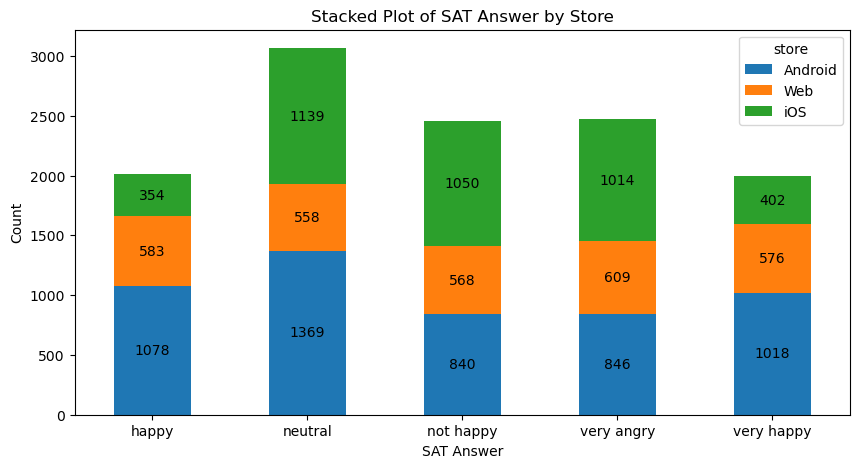

In [13]:
grouped = survey_df.groupby(['SAT_answer', 'store']).size().unstack()
ax = grouped.plot(kind='bar', stacked=True,figsize=(10,5))

plt.xlabel('SAT Answer')
plt.ylabel('Count')
plt.title('Stacked Plot of SAT Answer by Store')
plt.xticks(rotation='horizontal')
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)
plt.show()


### Evolution of NPS score

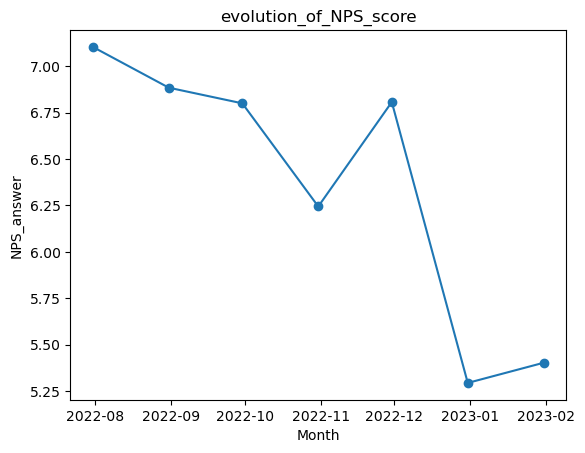

In [14]:
evolution_of_NPS_score = survey_df
evolution_plot(df=evolution_of_NPS_score,date_column="start_date",analyzed_value="NPS_answer",title="evolution_of_NPS_score")

### Evolution of Rate by month

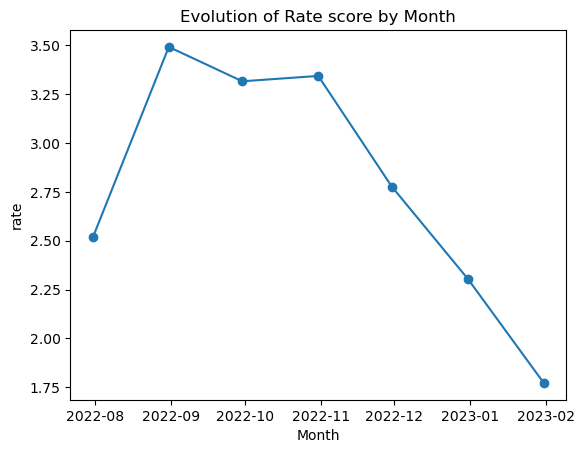

In [15]:
evolution_of_rate_score = reviews_df
evolution_plot(df=evolution_of_rate_score,date_column='start_date',analyzed_value='rate',title='Evolution of Rate score by Month')

### Distribution of acces in analytics logs

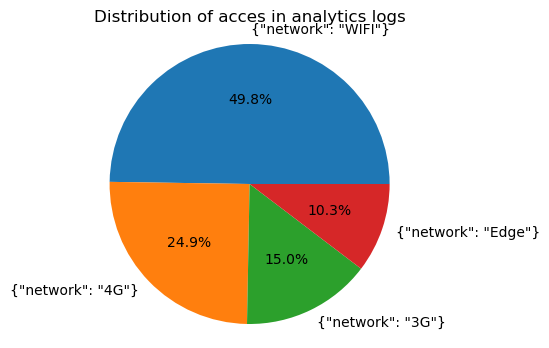

In [16]:
acces_counts = analytics_logs_df["access"].value_counts()
plt.figure(figsize=(5,4))
plt.pie(acces_counts,labels=acces_counts.index,autopct='%1.1f%%')
plt.title('Distribution of acces in analytics logs')
plt.axis('equal')
plt.show()

### User activity / analytics_logs

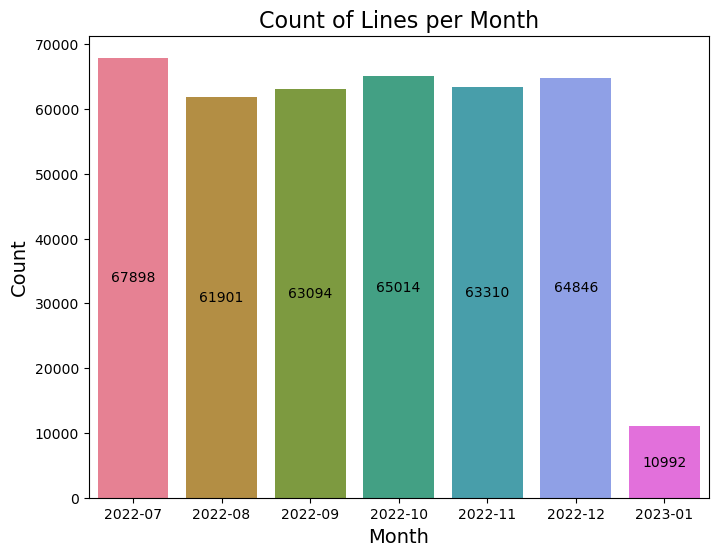

In [17]:
monthly_counts_df = analytics_logs_df
monthly_counts_df["M"] = monthly_counts_df["date"].dt.to_period("M")
monthly_count = monthly_counts_df.groupby("M").count()
monthly_count = monthly_count["order"]
monthly_count = monthly_count.reset_index()


plt.figure(figsize=(8,6))
colors = sns.color_palette("husl", len(monthly_count))
ax = sns.barplot(x='M', y='order', data=monthly_count, palette=colors)
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)
plt.title('Count of Lines per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)

# show the plot
plt.show()
